# Estimates of $\nu_{\mathrm{max}}$ for PLATO P5 sample

### Preamble

In [1]:
import sys, glob
from numpy import *
from matplotlib.pyplot import *
import pandas as pd
from astropy import constants as const
rcParams['axes.linewidth'] = 2
rcParams['ytick.major.size'] = 8
rcParams['xtick.major.size'] = 8
rcParams['ytick.major.width'] = 2
rcParams['xtick.major.width'] = 2
rcParams['ytick.minor.size'] = 4
rcParams['xtick.minor.size'] = 4
rcParams['ytick.minor.width'] = 2
rcParams['xtick.minor.width'] = 2
rcParams['font.size'] = 18
rcParams['lines.markersize'] = 8
rcParams['lines.linewidth'] = 2

### Set solar parameters

In [2]:
g0 = const.GM_sun.value / const.R_sun.value**2 # m/s^2
g0 *= 100 # m/s^2 -> cm/s^2
Teff0 = 5777 # K
numax0 = 3050 # muHz

### Read in PLATO simulation from TRILEGAL
Using Step 01 (02 and 03 are also available)

In [3]:
df = pd.read_csv('platosim_STEP01.dat', sep = ' ')

### Set limits on the sample to select relevant stars

In [4]:
idx0 = (0 <= df.V ) &(df.V < 13) # Vmag limits
idx1 = (0 < df.B ) # Bmag limit
idx2 = (df.mu0 < (log10(150000)-1)*5) # Limit on distance modulus
idx3 = (df.mratio == 0) # mass ratio?? limit 
idx4 = (df.label < 9) # ?? 
idx5 = (df.Gc < 2) # ??
idxCut = idx0 & idx1 & idx2 & idx3 & idx4 & idx5

### Create arrays with parameters of the TRILEGAL sample
Using the extinction, Av, from the simulation, and scaling it to estimate the reddening 

In [5]:
EBV = df.Av[idxCut]/3.2 # mag
B_V = df.B[idxCut] - df.V[idxCut] - EBV # mag
Mv = df.V[idxCut] - df.mu0[idxCut] - df.Av[idxCut] # mag
Teff = 10**df.logTe[idxCut] # K
g = 10**df.logg[idxCut] # cm/s^2
numax = (g / g0) / sqrt( Teff / Teff0) * numax0 # muHz

### PLATO color magnitude cuts
Sample includes dwarf and subgiant stars with spectral type between F5 and K7, V<13. Is this P5? We'll call it P5...

Selection for dwarf stars:

$0.42<B-V≤1.38$  AND  $Mv≥5(B-V)+0.4$  AND  $Mv<5(B-V)+3.5$

Selection for sub-giant stars

$0.42<B-V<0.8$  AND  $Mv<5(B-V)+0.4$  AND  $Mv>5(B-V)-2$

$0.8≤B-V<1$  AND  $Mv<4.5$  AND  $Mv>5(B-V)-2$

### Create masked arrays with the above cuts

In [6]:
# Dwarfs
idxD0  = (0.42 < B_V) & (B_V <= 1.38)  &  (5*B_V + 0.4 <= Mv) & (Mv < 5*B_V + 3.5)

# Sub-giants
idxSG0 = (0.42 < B_V) & (B_V < 0.8)  &  (5*B_V - 2 < Mv) & (Mv < 5*B_V + 0.4)
idxSG1 = (0.8 <= B_V) & (B_V < 1)    &  (5*B_V - 2 < Mv) & (Mv < 4.5) 

# The combined selection
idxP5 = idxD0 | idxSG0 | idxSG1

### Plot HRD with the whole sample and the above cuts as boxes

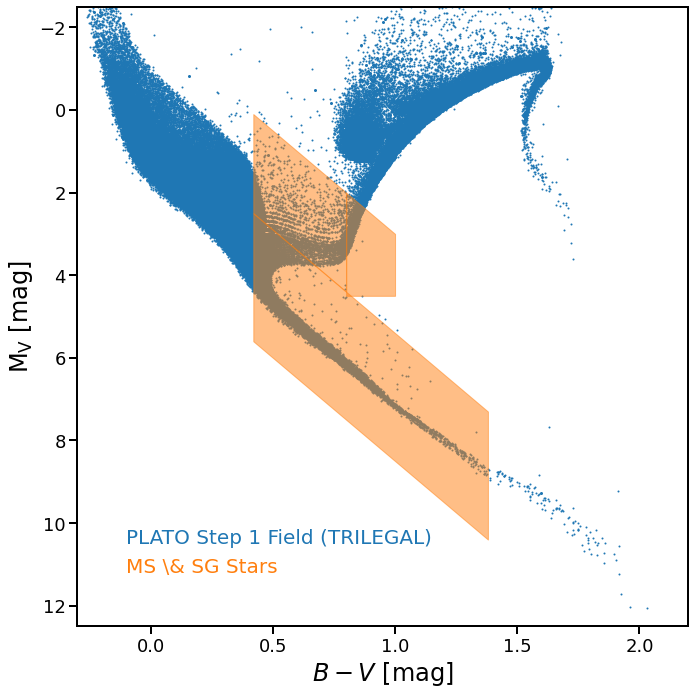

In [7]:
# DWARFS:
xd = array([0.42, 1.38])
D_Mv_0 = 5*xd + 0.4
D_Mv_1 = 5*xd + 3.5

# SUBGIANTS0:
xsg0 = array([0.42, 0.8])
SG0_Mv_0 = 5*xsg0 - 2
SG0_Mv_1 = 5*xsg0 + 0.4

# SUBGIANTS1:
xsg1 = array([0.8, 1])
SG1_Mv_0 = 5*xsg1 - 2
SG1_Mv_1 = array([4.5, 4.5])

fig, ax = subplots(figsize = (10,10))
ax.invert_yaxis()
ax.scatter(B_V, Mv, s = 1, c = 'C0')
ax.fill_between(xd, D_Mv_0, D_Mv_1  , alpha = 0.5, color = 'C1')
ax.fill_between(xsg0, SG0_Mv_0, SG0_Mv_1, alpha = 0.5, color = 'C1')
ax.fill_between(xsg1, SG1_Mv_0, SG1_Mv_1, alpha = 0.5, color = 'C1')
ax.set_xlim(-0.3,2.2)
ax.set_ylim(12.5, -2.5)
ax.set_xlabel('$B-V$ [mag]', fontsize = 24)
ax.set_ylabel('M$_\mathrm{V}$ [mag]', fontsize = 24)
ax.text(x = -0.1, y = 10.5, s = r'PLATO Step 1 Field (TRILEGAL)', color = 'C0', fontsize = 20)
ax.text(x = -0.1, y = 11.2, s = r'MS \& SG Stars', color = 'C1', fontsize = 20)
fig.tight_layout()
fig.savefig('PLATO_cuts_hrd.png')

### Plot histogram of all numax values

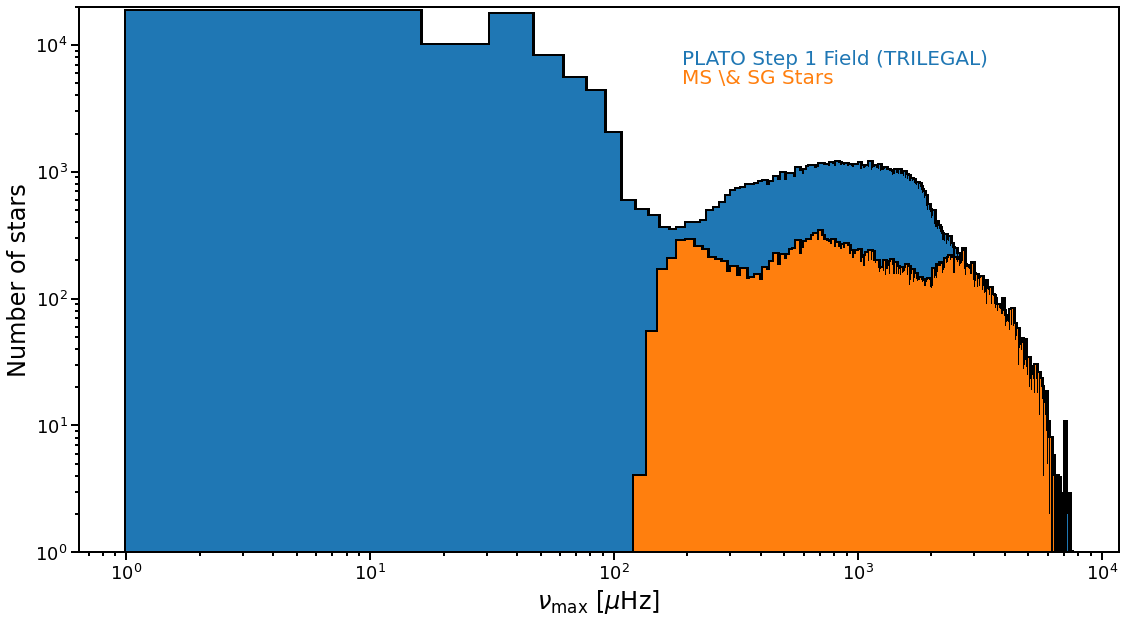

In [8]:
fig, ax = subplots(figsize = (16, 9))
r = linspace(1,7500,500)

# The complete sample
ax.hist(numax, bins = r, color = 'k', histtype = 'step', facecolor = None, lw = 5)
ax.hist(numax, bins = r, color = 'C0')
# The PLATO cut
ax.hist(numax[idxP5], bins = r, color = 'k', histtype = 'step', facecolor = None, lw = 5)
ax.hist(numax[idxP5], bins = r, color = 'C1')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\nu_{\mathrm{max}}$ [$\mu$Hz]', fontsize = 24)
ax.set_ylabel(r'Number of stars', fontsize = 24)
ax.text(x = 190, y = 7000, s = r'PLATO Step 1 Field (TRILEGAL)', color = 'C0', fontsize = 20)
ax.text(x = 190, y = 5000, s = r'MS \& SG Stars', color = 'C1', fontsize = 20)
ax.set_ylim(1,20000)
fig.tight_layout()
fig.savefig('PLATO_cuts_numax_hist.png')

### Select subsets of the P5 sample based on Teff and numax

In [9]:
# Temperature
idxHot = Teff[idxP5] > 6250
idxCool = ~idxHot

# numax
idxRG = numax[idxP5] < 600
idxSG = (600 <= numax[idxP5]) & (numax[idxP5] < 1500)
idxMS = 1500 <= numax[idxP5]

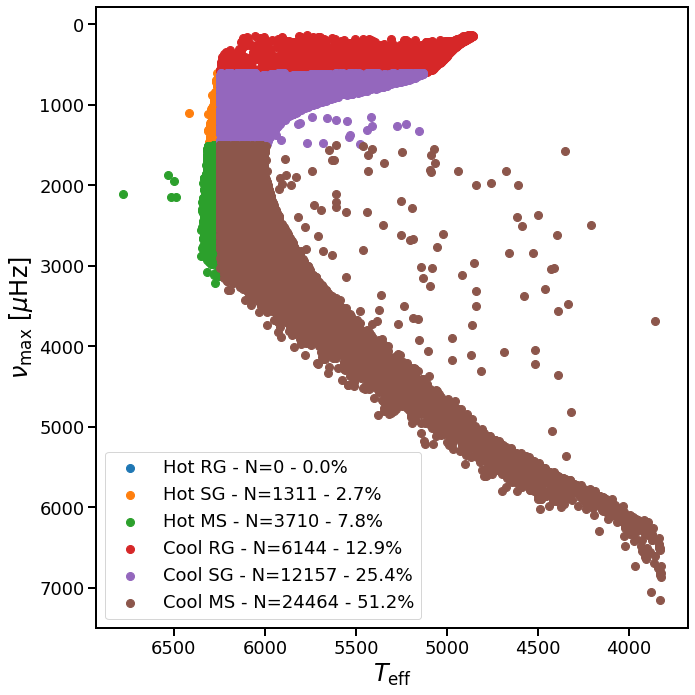

In [10]:
def make_scatter(ax, x, y, idx, lbl):
    """ Helper function for plotting scatter plots"""
    Ntotal = len(x)
    Nstars = len(x[idx])
    ax.scatter(x[idx], y[idx], label = f'{lbl} - N={Nstars} - {around(Nstars/Ntotal*100,1)}%')

fig, ax = subplots(figsize = (10,10))
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_ylabel(r'$\nu_{\mathrm{max}}$ [$\mu$Hz]', fontsize = 24)
ax.set_xlabel(r'$T_{\mathrm{eff}}$', fontsize = 24)

Ntotal = len(numax[idxP5]) # total number of stars in the P5 sample

make_scatter(ax, Teff[idxP5].values, numax[idxP5].values, idxHot & idxRG, 'Hot RG')
make_scatter(ax, Teff[idxP5].values, numax[idxP5].values, idxHot & idxSG, 'Hot SG')
make_scatter(ax, Teff[idxP5].values, numax[idxP5].values, idxHot & idxMS, 'Hot MS')

make_scatter(ax, Teff[idxP5].values, numax[idxP5].values, idxCool & idxRG, 'Cool RG')
make_scatter(ax, Teff[idxP5].values, numax[idxP5].values, idxCool & idxSG, 'Cool SG')
make_scatter(ax, Teff[idxP5].values, numax[idxP5].values, idxCool & idxMS, 'Cool MS')

legend(loc =3 , fontsize = 18)
fig.tight_layout()
fig.savefig('PLATO_teff_numax_selection.png')